C:\Users\gigabyte\Anaconda3\envs\CE888\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


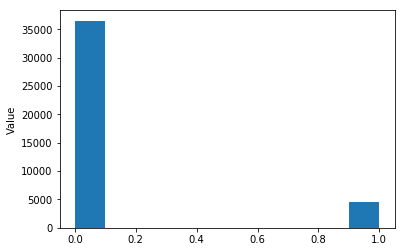

C:\Users\gigabyte\Anaconda3\envs\CE888\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fold test accuracy: 0.9723233794610342
Fold test accuracy: 0.9647972808934208
Fold test accuracy: 0.9577567370721048
Fold test accuracy: 0.9337217771303714
Fold test accuracy: 0.9376062151007526
Fold test accuracy: 0.945375091041515
Fold test accuracy: 0.8970623937848993
Fold test accuracy: 0.8800679776644816
Fold test accuracy: 0.8460417678484702
Fold test accuracy: 0.5755220981058766
Average accuracy: 89.10274718102926 %
Confusion matrix, without normalization


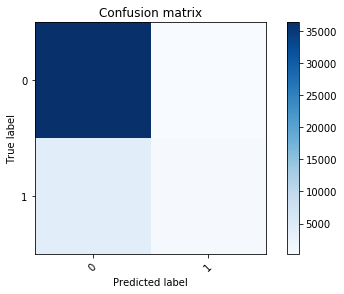

Done


In [5]:
import numpy as np 
#import matplotlib.pyplot as plt 
#import seaborn as sbs 
#import tensorflow as tf 
import sklearn as sk 
import pandas as pd

from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




data = pd.read_csv("bank-additional-full.csv") 
#data = pd.read_csv("bank-additional-full.csv",sep=',') 
#print(data.head(n=5))

df_dummies = pd.get_dummies(data)
df_dummies.pop("y_no")
df_dummies.pop("duration")

df_train = df_dummies.copy()
df_train.pop("y_yes")
df_target = df_dummies["y_yes"]

plt.hist(df_target, normed=False, bins=10)
plt.ylabel('Value')
plt.show()

clf = ExtraTreesClassifier(min_samples_split=5,max_depth=10)
score = []
k_fold = KFold(n_splits=10)


for train_indices, test_indices in k_fold.split(df_train):

    clf.fit(df_train.values[train_indices], df_target.values[train_indices])
    score.append(clf.score(df_train.values[test_indices], df_target.values[test_indices]))
    print('Fold test accuracy:', score[-1])

importances = clf.feature_importances_

print('Average accuracy: {} %'.format(np.mean(score)*100))


y_pred = clf.predict(df_train.values)
cnf_matrix = confusion_matrix(df_target.values, y_pred)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(df_target.values))), normalize = False,
                      title='Confusion matrix')
plt.show()
print("Done")

                